In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

from IPython.display import display, HTML

In [2]:
from IPython.display import display, HTML

# `Store` EDA

### Summary of `Store` dataset (prior to any processing)

In [3]:
store = pd.read_csv('store.csv')  
display( store.info())
display( store.describe())
display( store[['StoreType','Assortment','PromoInterval']].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


None

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


### Look at distribution of values for different subsets of the `Store` dataset

In [4]:
### STORE EDA
#store.groupby('StoreType').describe()
#store.groupby('Assortment').describe()
#store.groupby('PromoInterval').describe()
store[store.Promo2==0].describe()
#store.groupby(['StoreType','Assortment']).count()['Store']
#store.groupby(['PromoInterval','StoreType']).count()['Store']
#store.groupby(['PromoInterval','Assortment']).count()['Store']

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,544.000000,542.000000,396.000000,396.000000,544,0,0
mean,555.531250,6549.520295,7.260101,2009.123737,0,NaN,NaN
std,317.491536,9374.321188,3.176739,4.326819,0,NaN,NaN
min,1.000000,30.000000,1.000000,1990.000000,0,NaN,NaN
25%,280.250000,992.500000,4.000000,2006.000000,0,NaN,NaN
50%,559.000000,2640.000000,8.000000,2010.000000,0,NaN,NaN
75%,827.250000,8105.000000,10.000000,2013.000000,0,NaN,NaN
max,1114.000000,75860.000000,12.000000,2015.000000,0,NaN,NaN


Notes:

- **CompetitionDistance**: Only 3 stores are missing a distance. Look at historical sales... is filling with mean distance more appropriate? Currently set to 0.
    
- **Promo2** is a boolean populated for all stores. Only 571 stores have value 1 --> This exactly corresponds with 571 consumers who have non-missing values for the time since and interval variables associated Promo2 (**SinceWeek**, **SinceYear**, **Interval**).

### Histogram of all `Store` variables

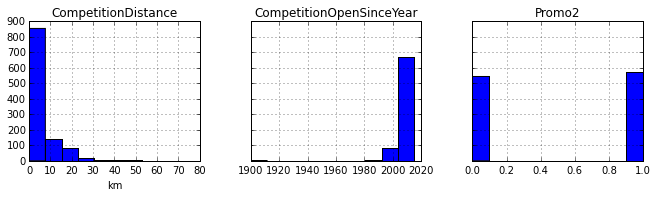

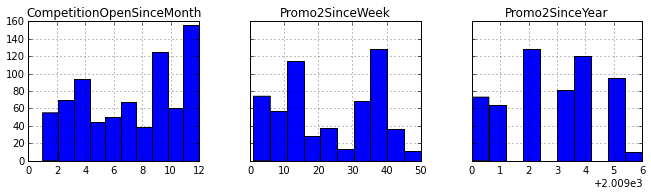

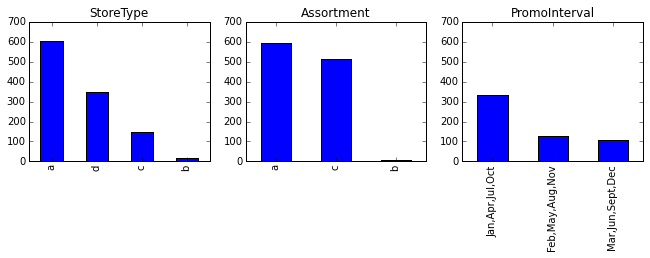

In [5]:
ax = store[['CompetitionDistance','CompetitionOpenSinceYear','Promo2']].hist(sharey=True, figsize=(11,2.5), layout = (1,3));
ax[0][0].set_xticklabels(map(int,ax[0][0].get_xticks()/1000))
ax[0][0].set_xlabel('km')
ax = store[['CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear']].hist(sharey=True, figsize=(11,2.5), layout = (1,3));

fig, ax = plt.subplots(1, 3, figsize =(11, 2.5))
# df[['StoreType','Assortment','PromoInterval']].value_counts().plot(kind='bar')
# title('Histogram of events by event type')
for i, col in enumerate(['StoreType','Assortment','PromoInterval']):
    store[col].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_ylim(0, 700)

# Merged EDA

In [6]:
data = pd.read_csv('train.csv', parse_dates = ['Date'])
#data = data[data['Open'] != 0]
store = pd.read_csv('store.csv') 
test = pd.read_csv('test.csv')

df = data.merge(store, on = 'Store', copy = False)

/Users/tracy/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


### Count of Unique Stores, compared across datasets

In [7]:
# Save set of all Stores in test dataset
test = pd.read_csv('test.csv', parse_dates = ['Date'])
test_stores = set(test.Store.unique())

# Save set of all Stores in train dataset
train_stores = set(df.Store.unique())

# Save set of all Stores in train dataset that are missing between Jul-2014 : Dec-2014 
# (see cells below for more analysis)
df.set_index('Date',inplace=True)
store_ct = df[df.index.month<8].groupby('Store').count()['Customers']
df.reset_index(inplace=True)
missing = set(store_ct[store_ct<635].index)

# Save set of all stores in both train and test datasets
both_stores = test_stores.intersection(train_stores)

# Save set of all stores in test dataset that are missing from the training dataset betw. Jul14:Dec14
test_stores_missing = test_stores.intersection(missing)

print '                            # Stores in each dataset'
print '                            ------------------------'
print '                               Train   Both   Test'
print '                       Total:   %d    %d    %d' % (len(train_stores), len(both_stores), len(test_stores))
print 'Missing Jul-2014 to Dec-2014:    %d    %d    %d' % (len(missing), len(test_stores_missing), len(test_stores_missing))

                            # Stores in each dataset
                            ------------------------
                               Train   Both   Test
                       Total:   1115    856    856
Missing Jul-2014 to Dec-2014:    180    180    180


### Summary of `Train` dataset (after merge with `Store` dataset -- no other processing)

In [9]:
display( df.info())
display( df.describe())
#print df[['StoreType','Assortment','PromoInterval']].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Date                         1017209 non-null datetime64[ns]
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1014567.000000,693861.000000,693861.000000,1017209.000000,509178.000000,509178.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647,5430.085652,7.222866,2008.690228,0.500564,23.269093,2011.752774
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056,7715.323700,3.211832,5.992644,0.500000,14.095973,1.662870
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000,2330.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### In 2014, some `StateHoliday` values are reported as `int(0)` instead of `'0'`

In [10]:
# Get unique values:
print 'State Holiday values, train: ', data.StateHoliday.unique()
print 'State Holiday values, train: ', test.StateHoliday.unique()

df_copy = data[['Date','Store','StateHoliday','Customers']].set_index('Date')
df_copy['Year'] = df_copy.index.year
df_copy['Month'] = df_copy.index.month
df_copy.reset_index(inplace=True)

df_copy.query('Year==2014 and Month==9').head()
df_copy['StateMapped'] = df_copy.StateHoliday.apply(lambda x: 'zero' if x==0 else x)
display (df_copy.groupby(['Year','StateMapped']).count()['Customers'])
#display (df.query('Year==2014').groupby(['Month','StateMapped']).count()['Customers'])

# pd.pivot_table(df_copy.query('Year==2014 and Month==9'), values='StateMapped', index='Date', columns='Store', 
#                aggfunc=lambda x: x.value_counts().index[0])

State Holiday values, train:  ['0' 'a' 'b' 'c' 0]
State Holiday values, train:  ['0' 'a']


Year  StateMapped
2013  0              394864
      a                7650
      b                2230
      c                2230
2014  0              231572
      a                7111
      b                2230
      c                1870
      zero           131072
2015  0              228651
      a                5499
      b                2230
Name: Customers, dtype: int64

### Preliminary char-gen for merged `Train` dataset (mainly date processing and filling NAs)

In [220]:
# set index to Date
df = df.set_index('Date')

# extract month, year, week of year and 'bi-week' of year
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['woy'] = df.index.weekofyear
df['woy2'] = np.array(np.ceil(df.woy/2.0), dtype=int)

# make a copy of the year column, and reindex to match 'week of year'
#    for example, the last few days of december 2013 are assigned 'week of year' == 1
#    therefore, these days should have woy_yr set to 2014... because they appear in 
#    the first week of 2014 (not the first week of 2013)
df['woy_yr'] = df.index.year
df.loc[np.logical_and(df.Month==12, df.woy==1), 'woy_yr']+= 1
df = df.reset_index()

df['Sales_perCust'] = np.zeros(df.Sales.shape)
df.loc[df.Customers>0,'Sales_perCust'] = df.loc[df.Customers>0,'Sales'] / df.loc[df.Customers>0,'Customers']

# Fill PromoInterval missing values with string, so that they can be properly counted 
# as their own category in groupby statements, etc.
df['PromoInterval'] = df['PromoInterval'].fillna('N/A')

# In StateHoliday Replace int values with strings
df['StateHoliday'] = df['StateHoliday'].apply(str)

# Bin competition distance (for EDA purposes)
#    1 = low   (<1 km)
#    2 = close (1.0 - 2.5 km)
#    3 = mid   (2.5 - 7.5 km)
#    4 = dist  (7.5 - 15. km)
#    5 = far   (> 15 km)
# Note: 3 stores are missing a distance, for now they're assigned the median
#       distance (2.325 km), which puts them in bin 2: "close"
temp_distance = df['CompetitionDistance'].fillna(2325) # Median value
df['DistType'] = pd.cut(temp_distance, 
                        bins=[-1, 1000, 2500, 7500, 15000, 100000], 
                        labels=[1, 2, 3, 4, 5])
df.DistType = np.array(df.DistType.values, np.dtype(int))
#df.DistType = df.DistType.cat.add_categories(['N/A'])

# Copy dataframe, including only open days for each store
df_open = df[df['Open']==1]


# extract month, year, week of year and 'bi-week' of year
test.set_index('Date',inplace=True)
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test.reset_index(inplace=True)

In [221]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Year,Month,Day,woy,woy2,woy_yr,DistType,Sales_perCust
0,2015-07-31,1,5,5263,555,1,1,0,1,c,...,NaN,N/A,2015,7,31,31,16,2015,2,9.482883
1,2015-07-30,1,4,5020,546,1,1,0,1,c,...,NaN,N/A,2015,7,30,31,16,2015,2,9.194139
2,2015-07-29,1,3,4782,523,1,1,0,1,c,...,NaN,N/A,2015,7,29,31,16,2015,2,9.143403
3,2015-07-28,1,2,5011,560,1,1,0,1,c,...,NaN,N/A,2015,7,28,31,16,2015,2,8.948214
4,2015-07-27,1,1,6102,612,1,1,0,1,c,...,NaN,N/A,2015,7,27,31,16,2015,2,9.970588


### Quick summary of `df_open` dataset (merged `train` data, filtered to include open days for each store)

In [12]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 25 columns):
Date                         844392 non-null datetime64[ns]
Store                        844392 non-null int64
DayOfWeek                    844392 non-null int64
Sales                        844392 non-null int64
Customers                    844392 non-null int64
Open                         844392 non-null int64
Promo                        844392 non-null int64
StateHoliday                 844392 non-null object
SchoolHoliday                844392 non-null int64
StoreType                    844392 non-null object
Assortment                   844392 non-null object
CompetitionDistance          842206 non-null float64
CompetitionOpenSinceMonth    575773 non-null float64
CompetitionOpenSinceYear     575773 non-null float64
Promo2                       844392 non-null int64
Promo2SinceWeek              421085 non-null float64
Promo2SinceYear              421085 non-null float64

### Check for missing dates

In [13]:
print 'Dates range from %s to %s' % (df.Date.min().strftime('%Y-%m-%d'), 
                                     df.Date.max().strftime('%Y-%m-%d'))

Dates range from 2013-01-01 to 2015-07-31


There are 180 stores (see above) that have no reported records from 2014-07-01 to 2014-12-31.


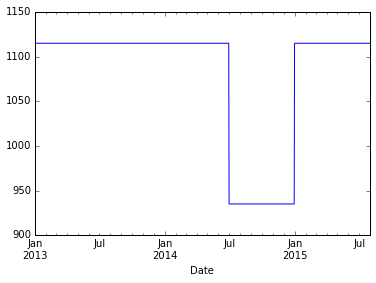

In [14]:
date_ct = df.groupby('Date').count()['Store']
missing = date_ct[date_ct<1000].index
print 'There are 180 stores (see above) that have no reported records from %s to %s.' % \
    (missing.min().strftime('%Y-%m-%d'), missing.max().strftime('%Y-%m-%d'))
    
df.groupby('Date').count()['Store'].plot();

In [15]:
print 'Stores were reported for either 758, 941 or 942 days, as follows: (includes closed days)'
print '    (This is equivalent to number of rows reported for each store)'
display( df.groupby('Store').count().groupby('Date').count()['Sales'])
full_list = df.groupby('Store').count().index[df.groupby('Store').count()['Sales']>800].values

Stores were reported for either 758, 941 or 942 days, as follows: (includes closed days)
    (This is equivalent to number of rows reported for each store)


Date
758    180
941      1
942    934
Name: Sales, dtype: int64

#### Find list of 180 stores that were not reported between 2014-07-01 to 2014-12-31

In [16]:
store_ct = df.query('Month<8').groupby('Store').count()['Date']
missing_stores = store_ct[store_ct<635].index
display(len(missing_stores))

180

#### Find single store that was missing just one day from observation period

In [17]:
print 'Store 988 is missing the first day of record (2013-01-01)'
df.query('Store==988').tail(2)

Store 988 is missing the first day of record (2013-01-01)


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,woy,woy2,woy_yr,DistType
901253,2013-01-03,988,4,4335,737,1,0,0,1,a,...,NaN,NaN,N/A,2013,1,3,1,1,2013,1
901254,2013-01-02,988,3,4992,829,1,0,0,1,a,...,NaN,NaN,N/A,2013,1,2,1,1,2013,1


### Find list of stores that were open (and with Sales > 0) for every day in `Train` dataset (2013-01-01 to 2015-7-31)
This list can be used to test models and other analysis without having to clean data

In [18]:
temp = df_open.groupby('Store').count()[['Date']]
temp.sort('Date',inplace=True,ascending=False)
print temp.head(10)

temp = df.groupby('Store').count()[['Date']]
temp.sort('Date',inplace=True,ascending=False)
print temp.head(10)

# 10 stores to test models on: [769, 1097, 85, 562, 262, 733, 494, 682, 335, 423]

       Date
Store      
769     942
1097    942
85      942
562     942
262     942
733     942
494     942
682     942
335     942
423     942
       Date
Store      
1       942
726     942
708     942
709     942
713     942
714     942
715     942
717     942
718     942
720     942


## Set of functions that plot average daily sales / customer cts

In [213]:
def plot_avg_daily(df, avg_cols, label, index2='Month'):
    if type(avg_cols) <> list:
        avg_cols = [avg_cols]
    if index2[:3] == 'woy':
        yr_col = 'woy_yr'
    else:
        yr_col = 'Year'
    df_mo = df.groupby([yr_col,index2,'Store'], as_index=False).mean()
    df_mo2 = df_mo.groupby([yr_col,index2]).mean()[avg_cols]

    df_mo2.plot();
    plt.title('Avg Daily Values across All Stores\n%s' % label);

def plot_avg_daily_grouped(df, avg_col, by_col, index2='Month', plot_all=False):
    if index2[:3] == 'woy':
        yr_col = 'woy_yr'
    else:
        yr_col = 'Year'
    df_mo = df.groupby([yr_col,index2,'Store', by_col], as_index=False).mean()
    df_mo2 = pd.pivot_table(df_mo, values=avg_col, index=[yr_col, index2], 
                            columns=[by_col], aggfunc=np.mean)
    
    linestyles = ['-', '-', '-', '-', '-', '-', '-', 
                  '--', '--', '--', '--', '--', '--', '--',
                  ':', ':', ':', ':', ':', ':', ':']
    ax = df_mo2.plot(figsize=(10,3), style=linestyles[:df_mo2.shape[1]]);
    if plot_all:
        df_mo = df.groupby([yr_col,index2,'Store'], as_index=False).mean()
        df_mo2 = df_mo.groupby([yr_col,index2]).mean()[avg_col]

        df_mo2.plot(colormap='bone',ls='--',ax=ax);
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Avg Daily %s across All Stores\nby %s' % (avg_col, by_col));
    
def plot_avg_by_year(df, avg_col, label, index2='Month'):
    if index2[:3] == 'woy':
        yr_col = 'woy_yr'
    else:
        yr_col = 'Year'
    df_mo = df.groupby([yr_col,index2,'Store'], as_index=False).mean()
    df_mo2 = pd.pivot_table(df_mo, values=avg_col, index=[index2], 
                            columns=[yr_col], aggfunc=np.mean)

    df_mo2.plot(figsize=(10,5), grid=True);
    plt.title('Avg Daily Values across All Stores\n%s' % label);
    
def plot_avg_daily_lagged(df, avg_cols, label, index2='Month'):
    if index2[:3] == 'woy':
        yr_col = 'woy_yr'
    else:
        yr_col = 'Year'
    df_mo = df.groupby([yr_col,index2,'Store'], as_index=False).mean()
    df_mo2 = df_mo.groupby([yr_col,index2]).mean()[avg_cols]

    #df_mo2.plot();
    #plt.title('Avg Daily Values across All Stores\n%s' % label);
    
    if index2=='woy':
        x = [x + ((y-1)/52.0) for x, y in df_mo2.index.values[1:]]
    else:
        x = [x + ((y-1)/12.0) for x, y in df_mo2.index.values[1:]]
    y = df_mo2.values[1:]-df_mo2.values[:-1]
    #print x
    plt.figure(figsize=(10,5))
    plt.plot(x,y)
    plt.title('Avg Daily Sales across All Stores\nLagged - %s' % index2);
    plt.xlabel('Date')
    plt.ylabel('Avg. Daily Sales')
    
def plot_avg_daily_deseason(df, avg_cols, label, index2='Month'):
    if index2[:3] == 'woy':
        yr_col = 'woy_yr'
    else:
        yr_col = 'Year'
    df_mo = df.groupby([yr_col,index2,'Store'], as_index=False).mean()
    df_mo2 = df_mo.groupby(['Store',index2], as_index=False).mean()
    df_mo3 = df_mo.groupby([index2]).mean()[avg_cols]
    
    df_mo4 = df_mo.groupby([yr_col,index2]).mean()[avg_cols]
    df_mo5 = df_mo.groupby([yr_col,index2]).mean()[avg_cols]

    #df_mo2.plot();
    #plt.title('Avg Daily Values across All Stores\n%s' % label);
    
    y = df_mo4.values
    if index2[:3]=='woy':
        i1 = len(df_mo3.values)
        i2 = 2*i1
        i3 = len(df_mo4.values) % i1
        x = [a + ((b-1)/float(i1)) for a, b in df_mo4.index.values]
        y[:i1] = y[:i1] - df_mo3.values
        y[i1:i2] = y[i1:i2] - df_mo3.values
        y[i2:] = y[i2:] - df_mo3.values[:i3]
        z = np.vstack([y, df_mo5.values, np.hstack([df_mo3.values, df_mo3.values, df_mo3.values[:i3]])]).T
    else:
        x = [a + ((b-1)/12.0) for a, b in df_mo4.index.values]
        y[:12] = y[:12] - df_mo3.values
        y[12:24] = y[12:24] - df_mo3.values
        y[24:] = y[24:] - df_mo3.values[:7]
        z = np.vstack([y, df_mo5.values, np.hstack([df_mo3.values, df_mo3.values, df_mo3.values[:7]])]).T
    plt.figure(figsize=(10,5))
    plt.plot(x,z)
    plt.legend(['de-seasonalized','unadjusted', 'seasonal mean'],loc='best')
    plt.title('Avg Daily Sales across All Stores\n%s' % index2);
    plt.xlabel('Date')
    plt.ylabel('Avg. Daily Sales')

## Plot Avg Daily Sales, Compared year to year

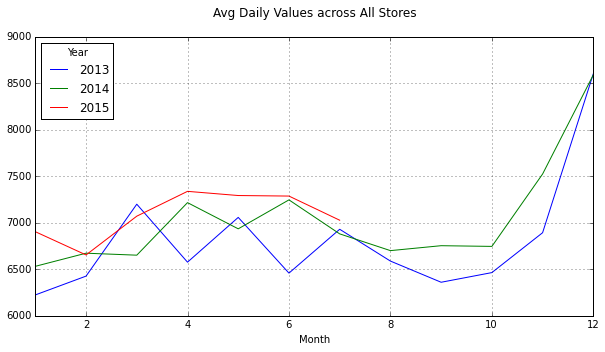

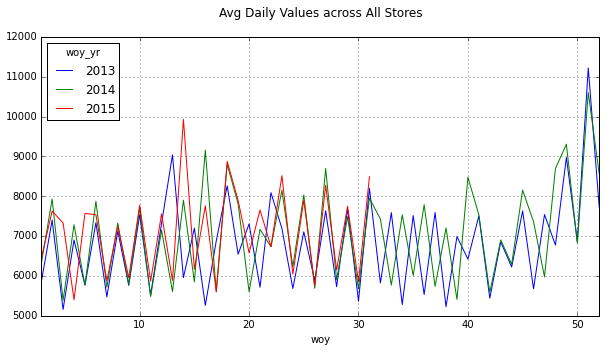

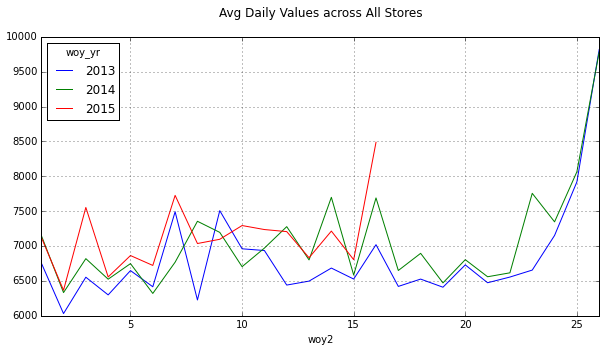

In [20]:
plot_avg_by_year(df_open, 'Sales', '')
plot_avg_by_year(df_open, 'Sales', '', index2='woy')
plot_avg_by_year(df_open, 'Sales', '', index2='woy2')

## Plot Avg Daily Sales, looking at lagged .vs deseasonalized time series

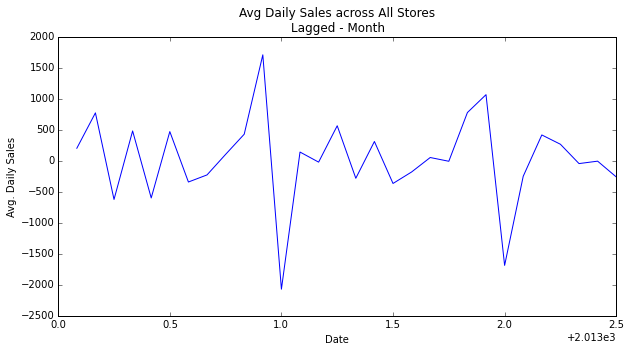

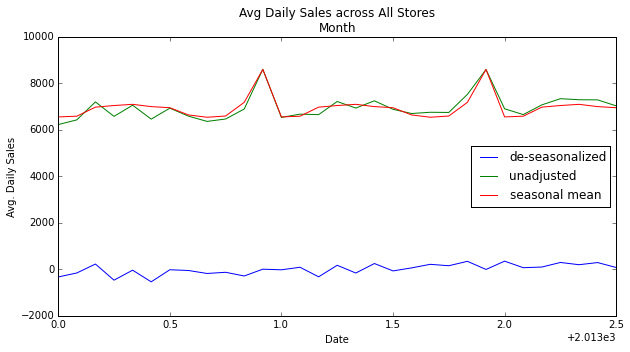

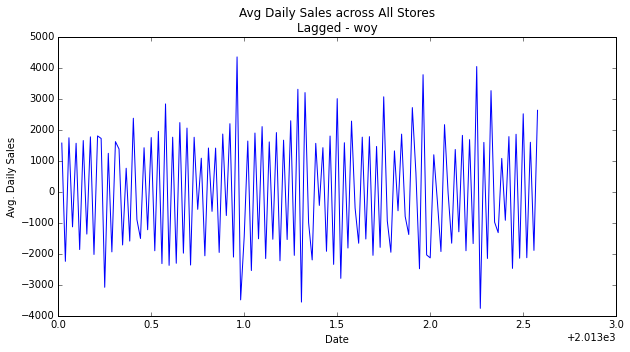

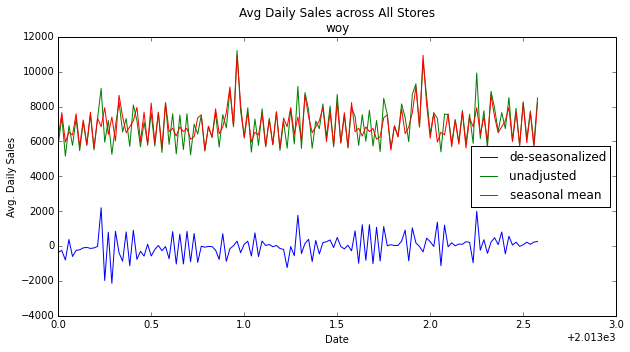

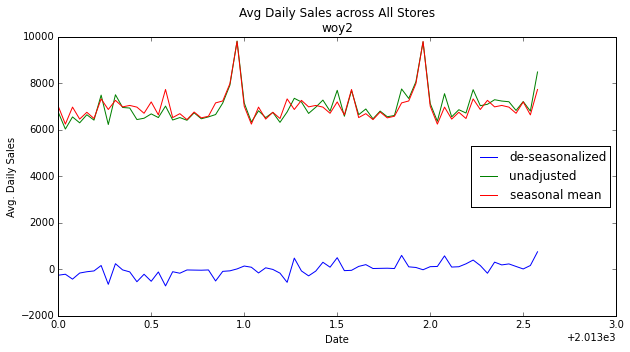

In [21]:
plot_avg_daily_lagged(df_open, 'Sales', '', index2='Month')
plot_avg_daily_deseason(df_open, 'Sales', '', index2='Month')

plot_avg_daily_lagged(df_open, 'Sales', '', index2='woy')
plot_avg_daily_deseason(df_open, 'Sales', '', index2='woy')
plot_avg_daily_deseason(df_open, 'Sales', '', index2='woy2')

## Compare Sales at stores

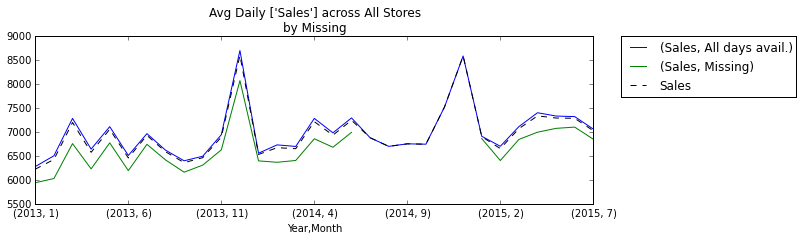

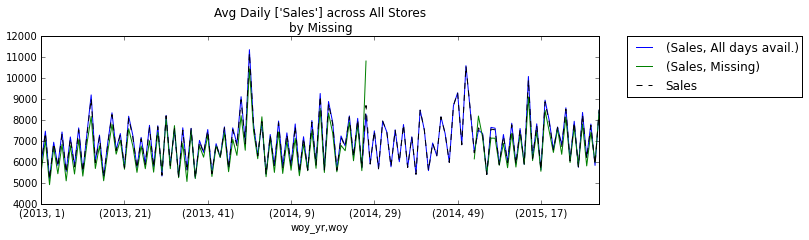

In [22]:
# set of stores that were reported for all days 
# (i.e. excluding 180 stores that are 'missing' for last half of 2014)
df_full = df_open.copy()
df_full['Missing'] = df_full['Store'].isin(set(missing_stores)).apply(lambda x: 'Missing' if x else 'All days avail.')
#df_full.groupby('Missing').count()

plot_avg_daily_grouped(df_full, ['Sales'], 'Missing', plot_all=True)
plot_avg_daily_grouped(df_full, ['Sales'], 'Missing', index2='woy', plot_all=True)

NOTE: StoreType b and Assortment b are both a very small subset of the data


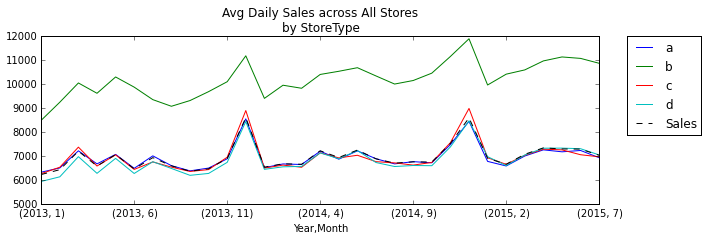

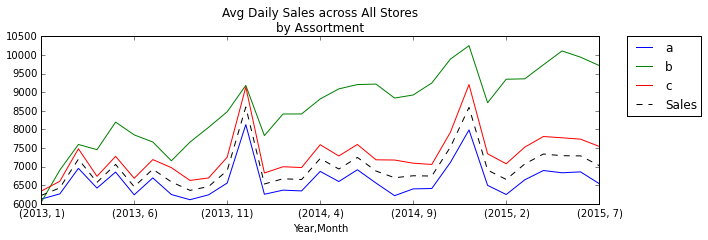

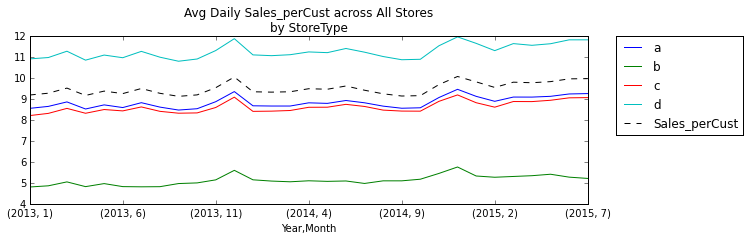

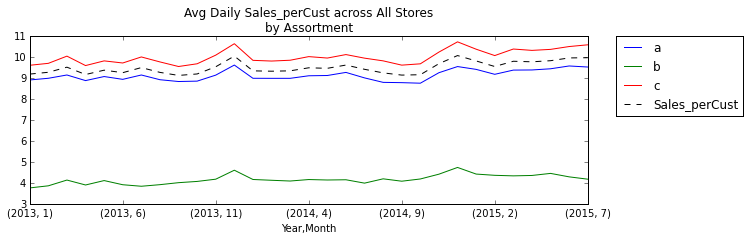

In [222]:
#df_open = df[df['Open']==1]
print 'NOTE: StoreType b and Assortment b are both a very small subset of the data'
plot_avg_daily_grouped(df_open, 'Sales', 'StoreType', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales', 'Assortment', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'StoreType', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'Assortment', plot_all=True)

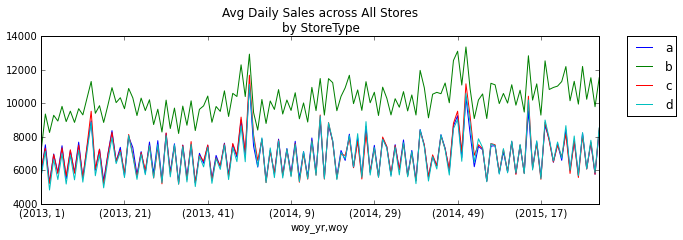

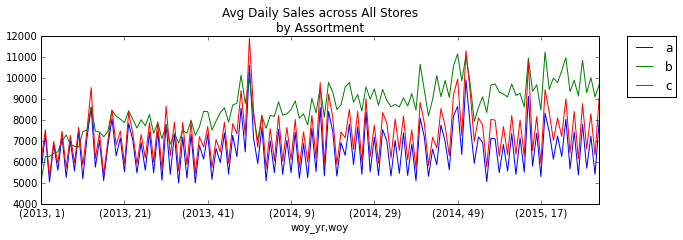

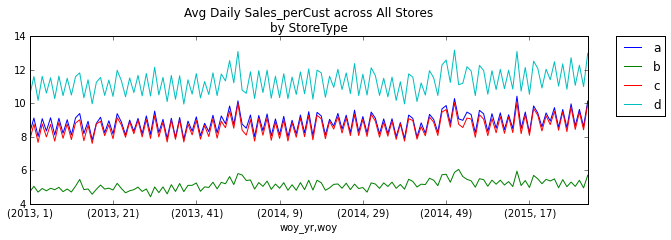

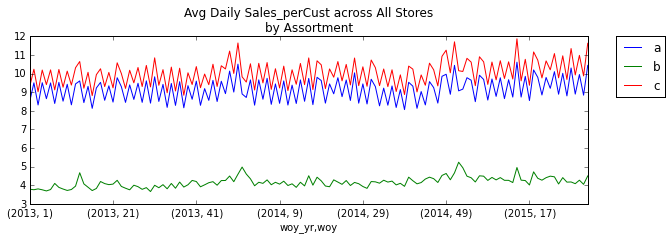

In [223]:

plot_avg_daily_grouped(df_open, 'Sales', 'StoreType', index2='woy')
plot_avg_daily_grouped(df_open, 'Sales', 'Assortment', index2='woy')
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'StoreType', index2='woy')
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'Assortment', index2='woy')

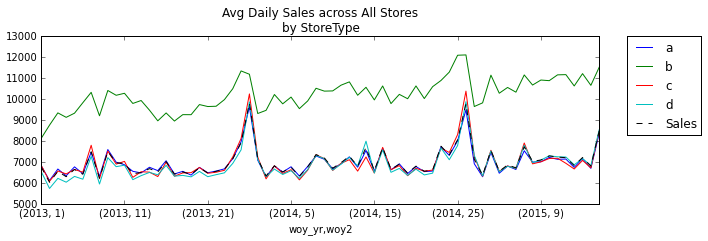

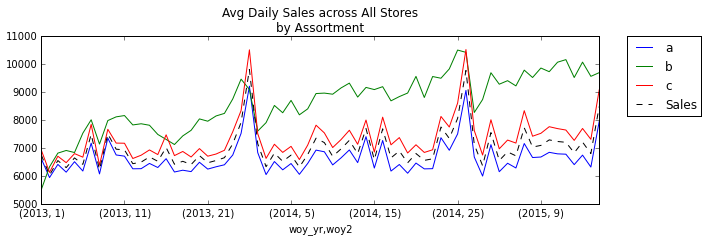

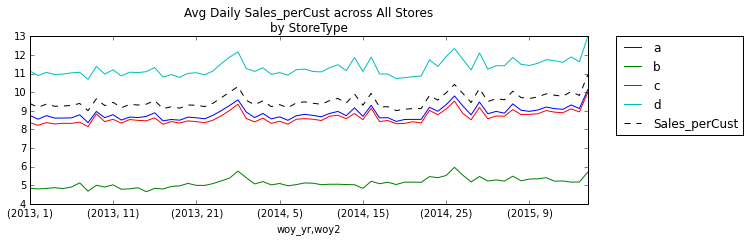

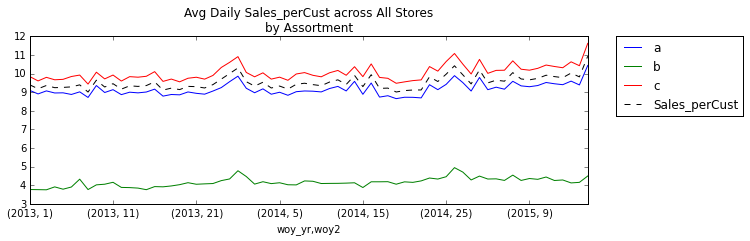

In [227]:

plot_avg_daily_grouped(df_open, 'Sales', 'StoreType', index2='woy2', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales', 'Assortment', index2='woy2', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'StoreType', index2='woy2', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'Assortment', index2='woy2', plot_all=True)

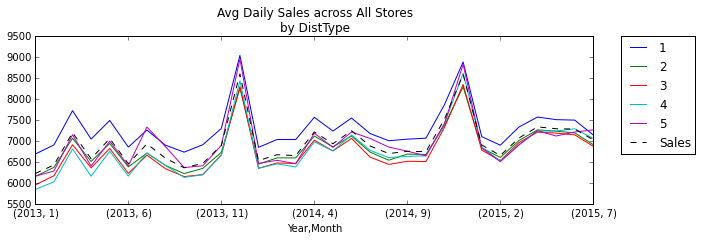

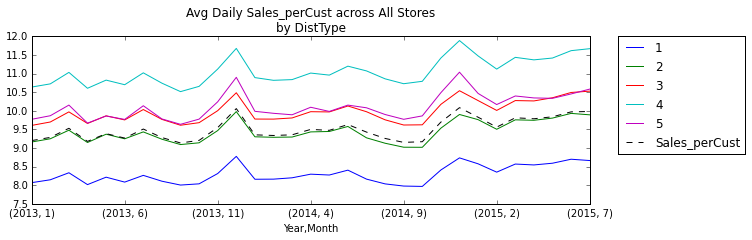

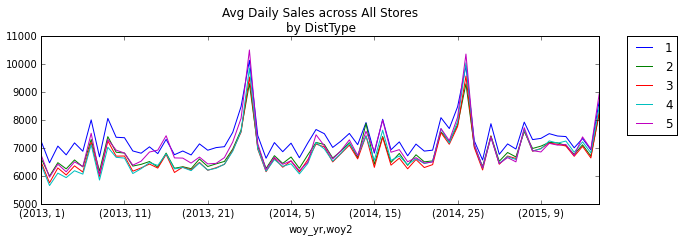

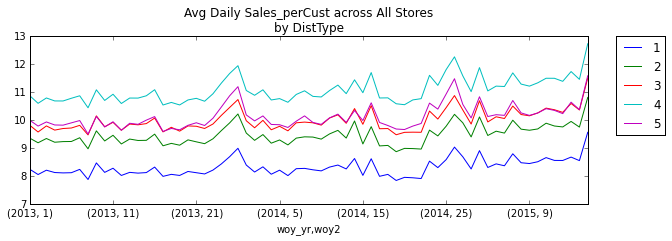

In [225]:
plot_avg_daily_grouped(df_open, 'Sales', 'DistType', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'DistType', plot_all=True)

plot_avg_daily_grouped(df_open, 'Sales', 'DistType', index2='woy2')
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'DistType', index2='woy2')

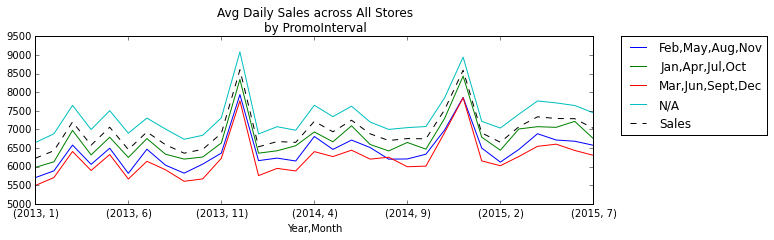

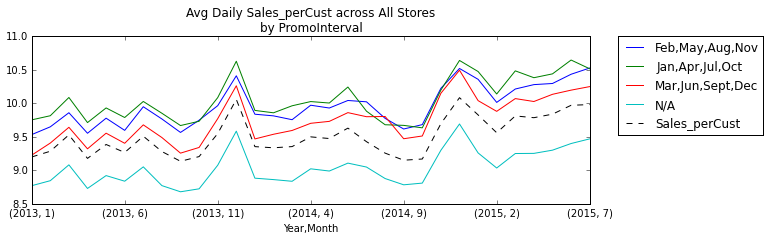

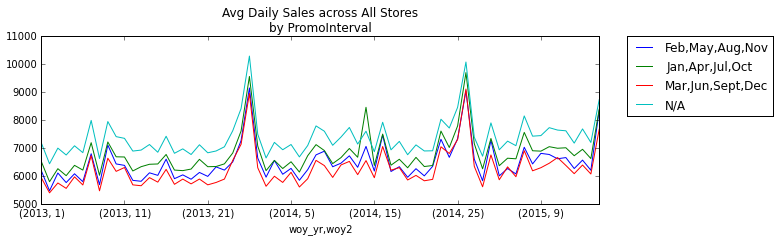

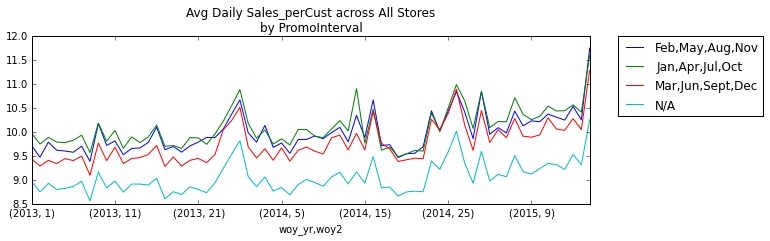

In [228]:
# Promo intervals:
plot_avg_daily_grouped(df_open, 'Sales', 'PromoInterval', plot_all=True)
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'PromoInterval', plot_all=True)

plot_avg_daily_grouped(df_open, 'Sales', 'PromoInterval', index2='woy2')
plot_avg_daily_grouped(df_open, 'Sales_perCust', 'PromoInterval', index2='woy2')

In [38]:
print df_open.query('DayOfWeek==7')[['StoreType','Assortment']].describe()

day_str = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
test2 = store[['Store', 'StoreType','Assortment']].set_index('Store')
test2.columns = ['Type',"Ass't"]
for i, s in enumerate(day_str):
    temp = df_open.loc[df_open.DayOfWeek==(i+1),['Store','Date']].groupby('Store').count()
    temp.columns = ['ct_'+s]
    test2 = test2.merge(temp, how='right', left_index=True, right_index=True, copy = False)
    
print 'There are %d stores that are open on Sundays\n' % \
    len(df_open.query('DayOfWeek==7')['Store'].unique())
print 'The following stores are open on every day of the week, with the given frequency: \n', test2


       StoreType Assortment
count       3593       3593
unique         3          3
top            b          c
freq        2216       1405
There are 33 stores that are open on Sundays

The following stores are open on every day of the week, with the given frequency: 
      Type Ass't  ct_Mon  ct_Tue  ct_Wed  ct_Thu  ct_Fri  ct_Sat  ct_Sun
Store                                                                   
85       b     a     134     135     135     135     135     134     134
122      a     c     134     134     132     131     130     134      90
209      a     c     134     134     132     131     130     134      87
259      b     b     132     133     133     134     134     133     133
262      b     a     134     135     135     135     135     134     134
274      b     b     133     134     134     133     133     132     133
299      d     c     134     134     132     131     131     134      86
310      a     c     134     134     132     131     130     134     102
3

## Look into Holidays during Aug-Sep forecast season

In [39]:
print df['StateHoliday'].unique()
print test['StateHoliday'].unique()

['0' 'a' 'b' 'c']
['0' 'a']


### School Holidays

In [109]:
print 'Number of School Holidays per month during forecast period (08-01 to 09-17):\n'
print "TRAIN:------------"
display( df.query('(Month == 8) or (Month == 9 and Day<18)').groupby(['Store','Month','Year']).sum()\
        [['Promo','SchoolHoliday']].unstack(level=[-2,-1]).transpose().sortlevel(1))

print "\nTEST:-------------"
display( test.groupby(['Store','Month']).sum()[['Promo','SchoolHoliday']].unstack().transpose().sortlevel(1))

Number of School Holidays per month during forecast period (08-01 to 09-17):

TRAIN:------------


Store                     1     2     3     4     5     6     7     8     \
              Month Year                                                   
Promo         8     2013    12    12    12    12    12    12    12    12   
                    2014    11    11    11    11    11    11    11    11   
SchoolHoliday 8     2013    16    17    22     2    17    17     2     2   
                    2014    31    21    13    16    21    21    16    16   
Promo         9     2013     5     5     5     5     5     5     5     5   
                    2014     8     8     8     8     8     8     8     8   
SchoolHoliday 9     2013     0     0     2     0     0     0     0     0   
                    2014     5     0     0     0     0     0     0     0   

Store                     9     10    ...   1106  1107  1108  1109  1110  \
              Month Year              ...                                  
Promo         8     2013    12    12  ...     12    12    12    12    12   
                    2014    11    11  ...     11   NaN    11   NaN    11   
SchoolHoliday 8     2013    22     7  ...      2    22    17    22     2   
                    2014    13    31  ...     16   NaN    21   NaN    16   
Promo         9     2013     5     5  ...      5     5     5     5     5   
                    2014     8     8  ...      8   NaN     8   NaN     8   
SchoolHoliday 9     2013     2     0  ...      0     8     0     8     0   
                    2014     0    10  ...      0   NaN     0   NaN     0   

Store                     1111  1112  1113  1114  1115  
              Month Year                                
Promo         8     2013    12    12    12    12    12  
                    2014    11    11    11    11    11  
SchoolHoliday 8     2013    22    22     2     0    16  
                    2014    13    13    16    14    31  
Promo         9     2013     5     5     5     5     5  
                    2014     8     8     8     8     8  
SchoolHoliday 9     2013     2     2     0     0     0  
                    2014     0     0     0     0     5  

[8 rows x 1115 columns]


TEST:-------------


,Store,1,3,7,8,9,10,11,12,13,14,...,1104,1105,1106,1107,1109,1111,1112,1113,1114,1115
,Month,,,,,,,,,,,,,,,,,,,,,
Promo,8,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
SchoolHoliday,8,31,7,20,20,7,31,20,20,21,7,...,21,7,20,21,21,7,7,20,18,31
Promo,9,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
SchoolHoliday,9,4,0,0,0,0,2,0,0,10,0,...,10,0,0,10,10,0,0,0,0,4


In [112]:
print 'Same tables, filtered to include only days where stores are open\n'
print "TRAIN:------------"
display( df.query('((Month == 8) or (Month == 9 and Day<18)) and Open==1').groupby(['Store','Month','Year']).sum()\
        [['Promo','SchoolHoliday']].unstack(level=[-2,-1]).transpose().sortlevel(1))

print "\nTEST:-------------"
display( test.query('Open==1').groupby(['Store','Month']).sum()[['Promo','SchoolHoliday']].unstack().transpose().sortlevel(1))


Same tables, filtered to include only days where stores are open

TRAIN:------------


Store                     1     2     3     4     5     6     7     8     \
              Month Year                                                   
Promo         8     2013    12    12    12    12    12    12    12    12   
                    2014    11    11    11    11    11    11    11    11   
SchoolHoliday 8     2013    14    17    22     2    17    17     2     2   
                    2014    26    21    13    16    21    21    16    16   
Promo         9     2013     5     5     5     5     5     5     5     5   
                    2014     8     8     8     8     8     8     8     8   
SchoolHoliday 9     2013     0     0     2     0     0     0     0     0   
                    2014     5     0     0     0     0     0     0     0   

Store                     9     10    ...   1106  1107  1108  1109  1110  \
              Month Year              ...                                  
Promo         8     2013    12    12  ...     12    12    12    11    12   
                    2014    11    11  ...     11   NaN    11   NaN    11   
SchoolHoliday 8     2013    22     6  ...      2    22    17    21     2   
                    2014    13    26  ...     16   NaN    21   NaN    16   
Promo         9     2013     5     5  ...      5     5     5     5     5   
                    2014     8     8  ...      8   NaN     8   NaN     8   
SchoolHoliday 9     2013     2     0  ...      0     8     0     8     0   
                    2014     0     9  ...      0   NaN     0   NaN     0   

Store                     1111  1112  1113  1114  1115  
              Month Year                                
Promo         8     2013    12    12    12    12    12  
                    2014    11    11    11    11    11  
SchoolHoliday 8     2013    22    22     2     0    14  
                    2014    13    13    16    14    26  
Promo         9     2013     5     5     5     5     5  
                    2014     8     8     8     8     8  
SchoolHoliday 9     2013     2     2     0     0     0  
                    2014     0     0     0     0     5  

[8 rows x 1115 columns]


TEST:-------------


,Store,1,3,7,8,9,10,11,12,13,14,...,1104,1105,1106,1107,1109,1111,1112,1113,1114,1115
,Month,,,,,,,,,,,,,,,,,,,,,
Promo,8,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
SchoolHoliday,8,26,7,20,20,7,26,20,20,21,7,...,21,7,20,21,21,7,7,20,18,26
Promo,9,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
SchoolHoliday,9,4,0,0,0,0,2,0,0,10,0,...,10,0,0,10,10,0,0,0,0,4


### Identify groups of stores with the exact same Promo/Holiday days

In [49]:
temp = pd.pivot_table(df, index='Store', columns='Date', values='Promo').drop_duplicates()
print 'There are %d unique Promo groups within the dataset.' % temp.shape[0]

temp = pd.pivot_table(df, index='Store', columns='Date', values='SchoolHoliday').drop_duplicates()
print 'There are %d unique SchoolHoliday groups within the dataset.' % temp.shape[0]

There are 3 unique Promo groups within the dataset.
There are 13 unique SchoolHoliday groups within the dataset.


Same calculations, looking only at dates with no missing stores (2013/01/02 - 2014/06/30)

In [96]:
temp1 = df.set_index('Date')
temp1 = temp1['2013-01-02':'2014-06-30'].reset_index()
temp = pd.pivot_table(temp1, index='Store', columns='Date', values='Promo').drop_duplicates()
print 'There are %d unique Promo groups within the dataset.' % temp.shape[0]

temp = pd.pivot_table(temp1, index='Store', columns='Date', values='SchoolHoliday').drop_duplicates()
print 'There are %d unique SchoolHoliday groups within the dataset.' % temp.shape[0]
#display(temp)

There are 1 unique Promo groups within the dataset.
There are 12 unique SchoolHoliday groups within the dataset.


#### Count number of stores in each group, and save mapping between Store and group's id:

In [142]:
def count_unique_groups(df, col, filterDate=True):
    if filterDate:
        temp1 = df.set_index('Date')
        temp1 = temp1['2013-01-02':'2014-06-30'].reset_index()
    else:
        temp1 = df[['Store','Date','Open',col]]
    temp = pd.pivot_table(temp1, index='Store', columns='Date', values=col)
    temp_dedup = temp.drop_duplicates()

    # create list of unique appended strings
    uniqueStr = []
    for i in xrange(temp_dedup.values.shape[0]):
         uniqueStr.append( ','.join(map(str, list(temp_dedup.values[i,:].flat)) ))

    uniqueStr_dict = dict(zip(uniqueStr, range(len(uniqueStr))))

    # create list of appended strings on orig dataset
    uniqueStr_full = []
    for i in xrange(temp.values.shape[0]):
         uniqueStr_full.append( uniqueStr_dict[','.join(map(str, list(temp.values[i,:].flat)) )])

    store_grouped = store[store.Store.isin(set(df.Store.unique()))]
    store_grouped[col] = uniqueStr_full

    display(store_grouped.groupby(col).count()[['Store']].transpose())
    
    return store_grouped[['Store',col]].set_index('Store')
    

In [141]:
store.Store.isin(set(test.Store.unique()))

0        True
1       False
2        True
3       False
4       False
5       False
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16      False
17      False
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27      False
28       True
29       True
        ...  
1085     True
1086     True
1087     True
1088     True
1089    False
1090     True
1091     True
1092    False
1093     True
1094    False
1095     True
1096     True
1097    False
1098     True
1099     True
1100     True
1101     True
1102     True
1103     True
1104     True
1105     True
1106     True
1107    False
1108     True
1109    False
1110     True
1111     True
1112     True
1113     True
1114     True
Name: Store, dtype: bool

In [114]:
promo_id = count_unique_groups(df, 'Promo')
schoolHoliday_id = count_unique_groups(df, 'SchoolHoliday')

Promo,0
Store,1115


SchoolHoliday,0,1,2,3,4,5,6,7,8,9,10,11
Store,112,36,286,92,75,115,22,180,73,40,56,28


#### There are some stores that have a strong overlap in 'Open' days, but there are also many stores that have no overlap

In [116]:
temp1 = df.set_index('Date')
temp1 = temp1['2013-01-02':'2014-06-30'].reset_index()
temp = pd.pivot_table(temp1, index='Store', columns='Date', values='Open').drop_duplicates()
print 'There are %d unique Open groups within the dataset.' % temp.shape[0]
open_id = count_unique_groups(df, 'Open')

There are 117 unique Open groups within the dataset.


Open,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
Store,101,2,267,222,1,69,1,7,81,31,...,1,1,1,1,1,1,1,1,1,1


### State Holidays  - Same analysis on non-numeric field

In [51]:
temp = df[['Date','Store','StateHoliday']]
holidays = {'0':0, 'a':1, 'b':2, 'c':3, 'd': 4, 'e': 5}
temp.StateHoliday = temp.StateHoliday.apply(lambda x: holidays[x])
temp = pd.pivot_table(temp, index='Store', columns='Date', values='StateHoliday').drop_duplicates()
print 'There are %d unique StateHoliday groups within the dataset.' % temp.shape[0]

There are 9 unique StateHoliday groups within the dataset.


Same calculations, Look at dates before stores go missing:

In [117]:
temp = df.set_index('Date')
temp = temp['2013-01-02':'2014-06-30'].reset_index()
temp = temp[['Date','Store','StateHoliday']]
holidays = {'0':0, 'a':1, 'b':2, 'c':3, 'd': 4, 'e': 5}
temp.StateHoliday = temp.StateHoliday.apply(lambda x: holidays[x])
temp2 = pd.pivot_table(temp, index='Store', columns='Date', values='StateHoliday').drop_duplicates()
print 'There are %d unique StateHoliday groups within the dataset.' % temp2.shape[0]

stateHoliday_id = count_unique_groups(temp, 'StateHoliday');

There are 8 unique StateHoliday groups within the dataset.


StateHoliday,0,1,2,3,4,5,6,7
Store,112,36,326,257,75,180,73,56


In [711]:
print "TRAIN:------------"
display( df.query('Month >= 8 and Month <= 9').groupby(['StateHoliday','Month']).count()['Store'] )
print "Of the 180 stores with StateHoliday = 'a' (see above), %d are also in the missing_stores list." % \
    df.query('Month == 8 and StateHoliday=="a"').Store.isin(missing_stores).sum()   
print "Of these 180 stores, %d remained open on the StateHoliday in 2013." % \
    len(df.query('Month == 8 and StateHoliday=="a" and Open==1'))
print "The holiday in question falls on %s" % \
    pd.Series(df.query('Month == 8 and StateHoliday=="a"').Date.unique()).map(lambda x: x.strftime('%Y-%m-%d')).values

print "\nTEST:-------------"
display( test.groupby(['StateHoliday']).count()['Store'] )
print "Of the 180 stores with StateHoliday = 'a' (see above), %d are also in the missing_stores list." % \
    df.query('Month == 8 and StateHoliday=="a"').Store.isin(missing_stores).sum()
print "The holiday in question falls on %s" % \
    pd.Series(test.query('StateHoliday=="a"').Date.unique()).map(lambda x: x.strftime('%Y-%m-%d')).values

TRAIN:------------


StateHoliday  Month
0             8        63370
              9        61500
a             8          180
Name: Store, dtype: int64

Of the 180 stores with StateHoliday = 'a' (see above), 180 are also in the missing_stores list.
Of these 180 stores, 26 remained open on the StateHoliday in 2013.
The holiday in question falls on ['2013-08-15']

TEST:-------------


StateHoliday
0    40908
a      180
Name: Store, dtype: int64

Of the 180 stores with StateHoliday = 'a' (see above), 180 are also in the missing_stores list.
The holiday in question falls on ['2015-08-15']


*Note: August 15 = Assumption Day*

## Convert School Holiday to State

Use dates from this website to map between school holiday group and German State:

http://www.holidays-info.com/School-Holidays-Germany/2014/school-holidays_2014.html

| **Id** | **State**            |   | **Id** | **State**         |   | **Id** | **State**               |
|--------|-----------------------|---|--------|--------------------|---|--------|----------------------|
| 0      | Hesse                 |   | 5      | Schleswig Holstein |   | 9      | Rhineland Palatinate |
| 1      | Thuringia             |   | 6      | Bremen             |   | 10     | Saxony Anhalt        |
| 2      | Northrhine Westphalia |   | 6      | Lower Saxony       |   | 11     | Hamburg              |
| 3      | Berlin                |   | 7      | Bavaria\*\*\*         |   |        |                      |
| 4      | Saxony                |   | 8      | Baden Wuerttemberg |   |        |                      |

\*\*\* *Bavaria has exactly 180 stores. All 180 stores that are missing in the second half of 2014 were from Bavaria.*

The following states do not appear to be in the dataset (at least based on School Holidays): Brandenburg, Saarland, Mecklenburg West Pomerania

In [182]:
'''
df.loc[df.Store.isin(set(schoolHoliday_id.query('SchoolHoliday==10').index)),
            ['Store','Year','Month','Day','SchoolHoliday','Open']]\
            .query('SchoolHoliday==1 and ((Year==2013 and Month>1) or (Year==2014 and Month==1))')\
            .drop_duplicates(subset=['Month','Day','SchoolHoliday'])\
            .sort(columns=['Month','Day'])
'''

state_map = {0:'Hesse', 1:'Thuringia', 2:'Northrhine Westphalia', 
              3:'Berlin', 4:'Saxony', 5:'Schleswig-Holstein',
              6:'Bremen/Lower Saxony', 7:'Bavaria', 8:'Baden-Wuerttemberg',
              9:'Rhineland-Palatinate', 10:'Saxony-Anhalt', 11:'Hamburg'}
abbr_map = {0:'HE', 1:'TH', 2:'NW', 3:'BE', 4:'SN', 5:'SH',
            6:'HB/NI', 7:'BY', 8:'BW', 9:'RP', 10:'ST', 11:'HH'}

#### There are 8 unique SchoolHoliday groups in the `test` dataset

In [191]:
temp_Store = store.set_index('Store')
temp_Store['schoolHoliday_id'] = schoolHoliday_id
temp_Store['StateAbbr'] = schoolHoliday_id.applymap(lambda x: abbr_map[x])
temp_Store['State'] = schoolHoliday_id.applymap(lambda x: state_map[x])
temp_Store.reset_index(inplace=True)

print 'These are the unique groups that appear in the test dataset:'
display(temp_Store[temp_Store.Store.isin(set(test.Store.unique()))].groupby('schoolHoliday_id').count()[['Store']].transpose())

print 'This exactly matches the training counts for this subset of states:'
count_unique_groups(df,'SchoolHoliday')

print 'Displayed by State Name (instead of group id)'
display(temp_Store[temp_Store.Store.isin(set(test.Store.unique()))].groupby('State').count()[['Store']].transpose())

These are the unique groups that appear in the test dataset:


schoolHoliday_id,0,2,5,6,7,8,9,11
Store,112,286,115,22,180,73,40,28


This exactly matches the training counts for this subset of states:


SchoolHoliday,0,1,2,3,4,5,6,7,8,9,10,11
Store,112,36,286,92,75,115,22,180,73,40,56,28


Displayed by State Name (instead of group id)


State,Baden-Wuerttemberg,Bavaria,Bremen/Lower Saxony,Hamburg,Hesse,Northrhine Westphalia,Rhineland-Palatinate,Schleswig-Holstein
Store,73,180,22,28,112,286,40,115


In [188]:
print 'These states are not in the test set:', [state_map[x] for x in [1,3,4,10]]

These states are not in the test set: ['Thuringia', 'Berlin', 'Saxony', 'Saxony-Anhalt']


#### Look at cross-section between state_holiday group and school_holiday group

In [231]:
temp_Store = store.set_index('Store')
temp_Store['stateHoliday_id'] = stateHoliday_id
temp_Store['schoolHoliday_id'] = schoolHoliday_id
temp_Store['StateAbbr'] = schoolHoliday_id.applymap(lambda x: abbr_map[x])
temp_Store['State'] = schoolHoliday_id.applymap(lambda x: state_map[x])
temp_Store.reset_index(inplace=True)
temp_Store['PromoInterval'] = temp_Store['PromoInterval'].fillna('N/A')

display(temp_Store.groupby(['stateHoliday_id','State','StateAbbr']).count()[['Store']])

Store
stateHoliday_id State                 StateAbbr       
0               Hesse                 HE           112
1               Thuringia             TH            36
2               Northrhine Westphalia NW           286
                Rhineland-Palatinate  RP            40
3               Berlin                BE            92
                Bremen/Lower Saxony   HB/NI         22
                Hamburg               HH            28
                Schleswig-Holstein    SH           115
4               Saxony                SN            75
5               Bavaria               BY           180
6               Baden-Wuerttemberg    BW            73
7               Saxony-Anhalt         ST            56

In [199]:
# mapping between stateHoliday_id and region in Germany
region_map = {0:'Central:HE', 1:'Central:TH', 2:'West', 3:'North',
              4:'East', 5:'Southeast', 6:'Southwest', 7:'Central:ST'}

In [207]:
df_reg = df.set_index('Store')
df_reg['stateHoliday_id'] = stateHoliday_id
df_reg['schoolHoliday_id'] = schoolHoliday_id
df_reg['StateAbbr'] = schoolHoliday_id.applymap(lambda x: abbr_map[x])
df_reg['State'] = schoolHoliday_id.applymap(lambda x: state_map[x])
df_reg['Region'] = stateHoliday_id.applymap(lambda x: region_map[x])
df_reg.reset_index(inplace=True)

df_reg_open = df_reg.query('Open==1')
df_reg_open['Sales_perCust'] = df_reg_open.Sales/df_reg_open.Customers

/Users/tracy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


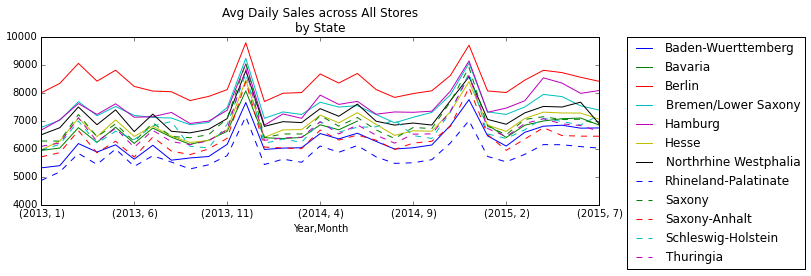

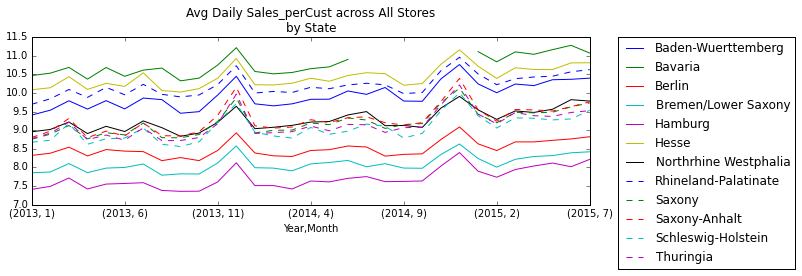

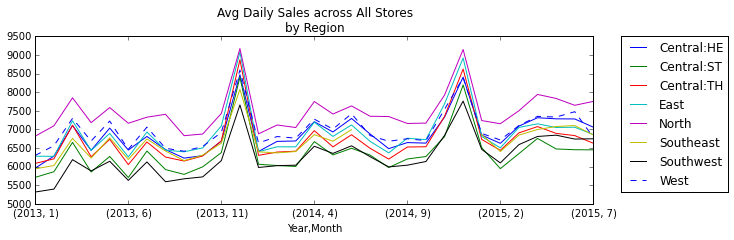

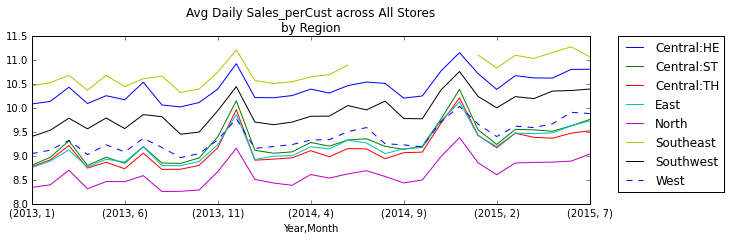

In [215]:
plot_avg_daily_grouped(df_reg_open, 'Sales', 'State')
plot_avg_daily_grouped(df_reg_open, 'Sales_perCust', 'State')

plot_avg_daily_grouped(df_reg_open, 'Sales', 'Region')
plot_avg_daily_grouped(df_reg_open, 'Sales_perCust', 'Region')

In [237]:
print 'Berlin and Bremen/Lower Saxony do not have seasonal promos:'
display(temp_Store.groupby(['State','StateAbbr','PromoInterval']).count()[['Store']].unstack(-1))

print 'StoreType is fairly well distributed by State:'
display(temp_Store.groupby(['State','StateAbbr','StoreType']).count()[['Store']].unstack(-1))

print 'Assortmnet is fairly well distributed by State:'
display(temp_Store.groupby(['State','StateAbbr','Assortment',]).count()[['Store']].unstack(-1))

Berlin and Bremen/Lower Saxony do not have seasonal promos:


Store                  \
PromoInterval                   Feb,May,Aug,Nov Jan,Apr,Jul,Oct   
State                 StateAbbr                                   
Baden-Wuerttemberg    BW                     15              25   
Bavaria               BY                     21             122   
Berlin                BE                    NaN             NaN   
Bremen/Lower Saxony   HB/NI                 NaN             NaN   
Hamburg               HH                    NaN               3   
Hesse                 HE                     14              40   
Northrhine Westphalia NW                     50              78   
Rhineland-Palatinate  RP                      9               6   
Saxony                SN                      1              20   
Saxony-Anhalt         ST                     10              11   
Schleswig-Holstein    SH                     10              13   
Thuringia             TH                    NaN              17   

                                                       
PromoInterval                   Mar,Jun,Sept,Dec  N/A  
State                 StateAbbr                        
Baden-Wuerttemberg    BW                      12   21  
Bavaria               BY                      13   24  
Berlin                BE                     NaN   92  
Bremen/Lower Saxony   HB/NI                  NaN   22  
Hamburg               HH                     NaN   25  
Hesse                 HE                      12   46  
Northrhine Westphalia NW                      28  130  
Rhineland-Palatinate  RP                      11   14  
Saxony                SN                       4   50  
Saxony-Anhalt         ST                       2   33  
Schleswig-Holstein    SH                      15   77  
Thuringia             TH                       9   10

StoreType is fairly well distributed by State:


Store            
StoreType                           a   b   c   d
State                 StateAbbr                  
Baden-Wuerttemberg    BW           33   2  13  25
Bavaria               BY           84   1  14  81
Berlin                BE           54   5  22  11
Bremen/Lower Saxony   HB/NI        12   1   5   4
Hamburg               HH           17   1   8   2
Hesse                 HE           40   3  12  57
Northrhine Westphalia NW          189   3  22  72
Rhineland-Palatinate  RP           12   1   3  24
Saxony                SN           37 NaN  19  19
Saxony-Anhalt         ST           30 NaN  11  15
Schleswig-Holstein    SH           74 NaN  12  29
Thuringia             TH           20 NaN   7   9

Assortmnet is fairly well distributed by State:


Store         
Assortment                          a   b    c
State                 StateAbbr               
Baden-Wuerttemberg    BW           31   2   40
Bavaria               BY          115   1   64
Berlin                BE           67 NaN   25
Bremen/Lower Saxony   HB/NI        14 NaN    8
Hamburg               HH           13 NaN   15
Hesse                 HE           57   3   52
Northrhine Westphalia NW          158   2  126
Rhineland-Palatinate  RP           21   1   18
Saxony                SN           49 NaN   26
Saxony-Anhalt         ST           31 NaN   25
Schleswig-Holstein    SH           14 NaN  101
Thuringia             TH           23 NaN   13

In [239]:
df_reg_open.groupby(['State','StateAbbr']).mean()[['Sales','Customers']].sort('Customers',ascending=False)

,,Sales,Customers
State,StateAbbr,,
Hamburg,HH,7647.051432,1031.332067
Berlin,BE,8357.772352,998.705845
Bremen/Lower Saxony,HB/NI,7535.286658,981.924213
Northrhine Westphalia,NW,7171.598101,798.618697
Schleswig-Holstein,SH,6743.729619,756.917136
Saxony,SN,6896.209692,750.377761
Thuringia,TH,6702.752568,730.692185
Hesse,HE,6879.563227,709.475330
Saxony-Anhalt,ST,6357.096281,684.616299


In [249]:
df_reg_open.groupby(['State','StateAbbr']).agg({'Sales':['min','mean','max'], 'Customers':['min','mean','max']}).sort(('Sales','max'),ascending=False)

Customers                    Sales  \
                                      min         mean   max   min   
State                 StateAbbr                                      
Bavaria               BY               36   630.632035  2960   297   
Hamburg               HH               44  1031.332067  5494   316   
Saxony                SN                0   750.377761  3145     0   
Berlin                BE               97   998.705845  7388   760   
Thuringia             TH                0   730.692185  2496     0   
Northrhine Westphalia NW                0   798.618697  4762     0   
Hesse                 HE                0   709.475330  3961     0   
Schleswig-Holstein    SH               40   756.917136  3507   286   
Saxony-Anhalt         ST                0   684.616299  2598     0   
Bremen/Lower Saxony   HB/NI           247   981.924213  4099  2015   
Baden-Wuerttemberg    BW                0   673.909409  2917     0   
Rhineland-Palatinate  RP                0   610.461964  3804     0   

                                                     
                                        mean    max  
State                 StateAbbr                      
Bavaria               BY         6630.657893  41551  
Hamburg               HH         7647.051432  38722  
Saxony                SN         6896.209692  38037  
Berlin                BE         8357.772352  38025  
Thuringia             TH         6702.752568  37646  
Northrhine Westphalia NW         7171.598101  35350  
Hesse                 HE         6879.563227  32368  
Schleswig-Holstein    SH         6743.729619  31269  
Saxony-Anhalt         ST         6357.096281  29501  
Bremen/Lower Saxony   HB/NI      7535.286658  28680  
Baden-Wuerttemberg    BW         6255.308699  25034  
Rhineland-Palatinate  RP         5800.355330  20167

In [273]:
print 'There are 54 days when (Open==1 and Sales==0). \nCustomers==0 on 52 of these days. Customers > 0 on 2 of these days.'
df_reg_open[df_reg_open.Sales==0].describe()

There are 54 days when (Open==1 and Sales==0). 
Customers==0 on 52 of these days. Customers > 0 on 2 of these days.


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Year,Month,Day,woy,woy2,woy_yr,DistType,stateHoliday_id,schoolHoliday_id,Sales_perCust
count,54.000000,54.000000,54,54.000000,54,54.000000,54.000000,54.000000,35.000000,35.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,2
mean,582.592593,3.703704,0,0.148148,1,0.388889,0.222222,2697.592593,7.828571,2008.600000,...,2013.703704,5.277778,15.481481,21.388889,10.925926,2013.703704,1.888889,2.666667,3.777778,0
std,340.093190,1.312202,0,0.786859,0,0.492076,0.419643,4544.648910,3.617650,5.801622,...,0.570654,2.817845,9.720123,11.784891,5.840173,0.570654,1.160134,2.119096,3.451369,0
min,25.000000,1.000000,0,0.000000,1,0.000000,0.000000,30.000000,2.000000,1990.000000,...,2013.000000,1.000000,1.000000,3.000000,2.000000,2013.000000,1.000000,0.000000,0.000000,0
25%,330.000000,3.000000,0,0.000000,1,0.000000,0.000000,237.500000,4.500000,2007.000000,...,2013.000000,3.000000,7.000000,11.250000,6.000000,2013.000000,1.000000,2.000000,2.000000,0
50%,662.000000,4.000000,0,0.000000,1,0.000000,0.000000,865.000000,10.000000,2009.000000,...,2014.000000,6.000000,14.000000,23.000000,12.000000,2014.000000,1.000000,2.000000,2.000000,0
75%,885.750000,4.000000,0,0.000000,1,1.000000,0.000000,2347.500000,11.000000,2013.000000,...,2014.000000,7.000000,24.000000,30.000000,15.000000,2014.000000,2.000000,4.000000,8.000000,0
max,1100.000000,6.000000,0,5.000000,1,1.000000,1.000000,19700.000000,12.000000,2014.000000,...,2015.000000,10.000000,31.000000,40.000000,20.000000,2015.000000,5.000000,7.000000,10.000000,0
